In [36]:
import os
os.environ["OMP_NUM_THREADS"]='1'
import matplotlib.pyplot as plt
import numpy as np
import pendula
import timeit
from shutil import rmtree
from IPython.display import Video
# import pysindy as ps

plt.rcParams.update({'font.size': 12, 'pdf.fonttype':42,'text.usetex': False, 'font.family': 'serif'})

def spring(p0,p1,div,height):
    l=np.linalg.norm(p1-p0)
    xhat=(p1-p0)/l
    yhat=np.array([xhat[1],-xhat[0]])
    return np.concatenate([[p0,p0+l/div*xhat],[p0+i*l/div*xhat+height*yhat*(-1)**i for i in range(2,div-1)],[p1-l/div*xhat,p1]])

colors = [
    "#ff7f0e",
    "#2ca02c",
    "#1f77b4",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

### Plot run from file

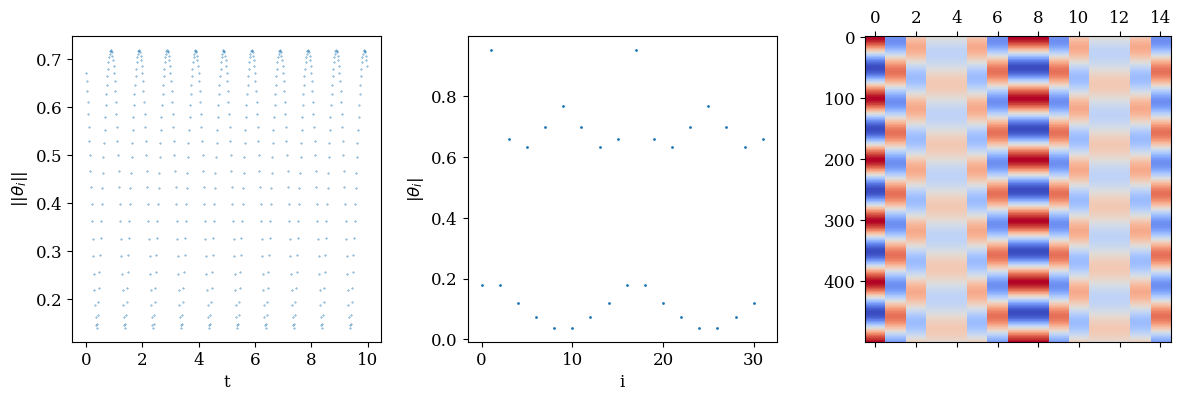

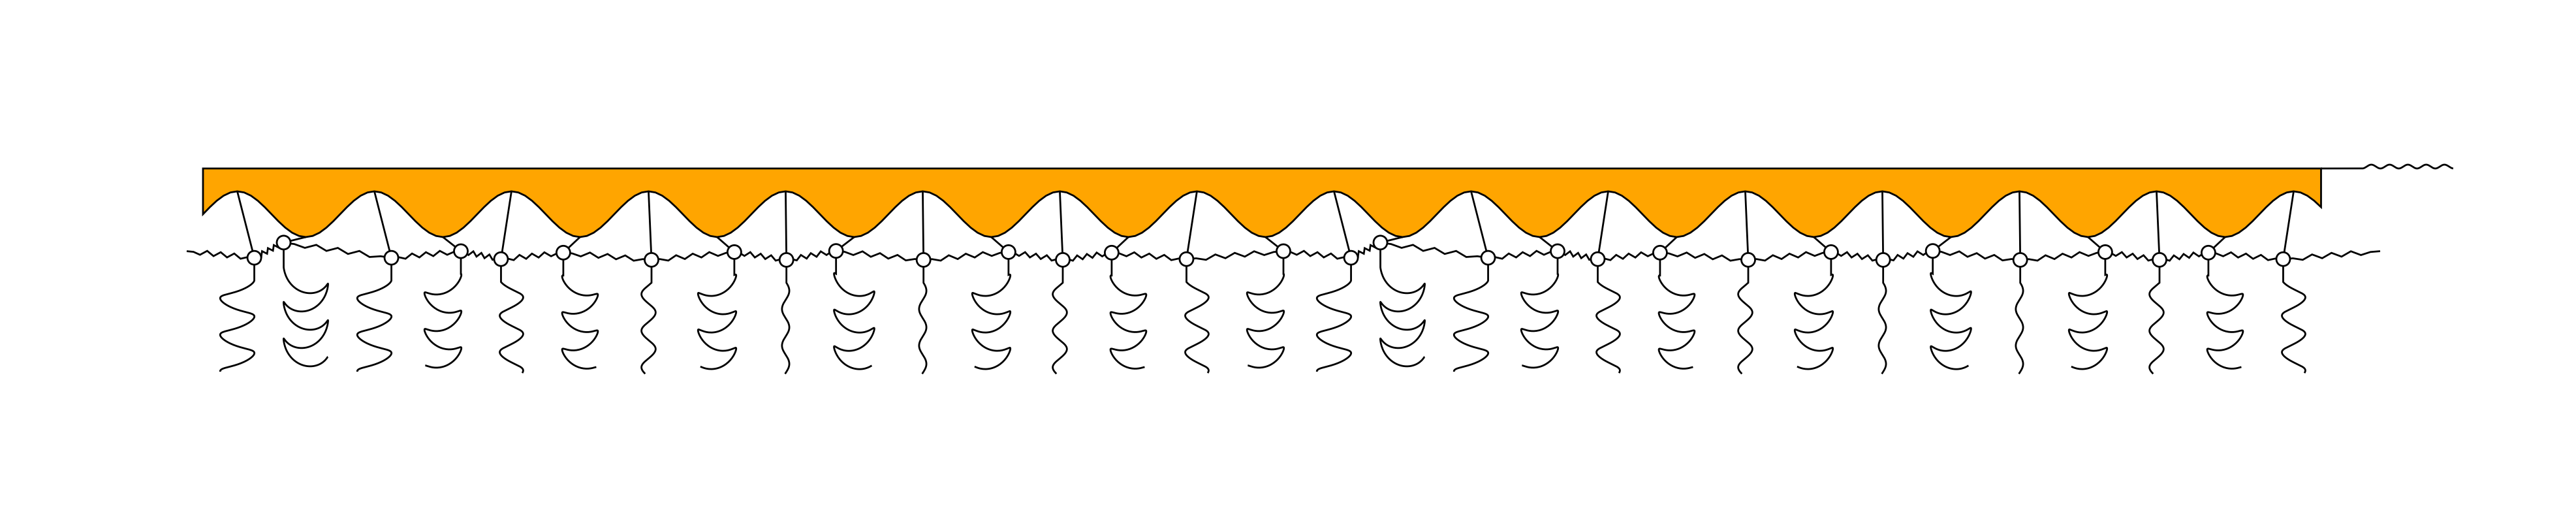

In [47]:
from scipy.interpolate import interp1d

filebase='data/pendula/17/rv6'
amp=np.loadtxt(filebase+'.dat')[-1][0]
dat=np.load(filebase+'final.dat.npy').T    

N=2*int((dat.shape[-1]-1-2)/6)
delta=0.25

t=dat[:,0]
x=dat[:,1:N//2+1]
y=dat[:,N//2+1:2*N//2+1]
theta=np.arctan2(y,x)
u=dat[:,3*N//2+1:4*N//2+1]
v=dat[:,4*N//2+1:5*N//2+1]
phi=np.arctan2(v,u)

num_cycles=5
Nt=500
dt=2*num_cycles/Nt

ftheta=interp1d(t,theta,axis=0)
fphi=interp1d(t,phi,axis=0)
ys=np.zeros((Nt,N))
ys[:,::2]=ftheta(np.mod(np.arange(Nt)/(Nt//num_cycles),1))
ys[:,1::2]=fphi(np.mod(np.arange(Nt)/(Nt//num_cycles),1))
ind=np.argmax(np.linalg.norm(ys[:,:N:2],axis=0))
ys=np.roll(ys,N//2-2*ind,axis=1)

fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].scatter(x=dt*np.arange(len(ys)),y=np.linalg.norm(ys[:,:N],axis=1)/N**0.5,s=0.1)
ax[0].set_xlabel('t')
ax[0].set_ylabel(r'$|| \theta_i ||$')

ax[1].scatter(x=np.arange(N),y=np.linalg.norm(ys[:,:N],axis=0)/len(ys)**0.5,s=1)
ax[1].set_xlabel('i')
ax[1].set_ylabel(r'$|\theta_i|$')

dat=ys[::1,2:N:2]
ratio=len(dat[0])/len(dat)
ax[2].matshow(dat,aspect=ratio,cmap='coolwarm',vmin=np.min(dat),vmax=np.max(dat))

plt.tight_layout()
plt.show()

n0=0
n1=31

dm=250
m0=len(ys)-500+dm
m1=len(ys)
m=m0

z0=-amp*np.cos(2*np.pi*dt*m)

fig=plt.figure(figsize=((n1-n0)*10,10))
lengths=1+0.5*(-1)**np.arange(N)
f=(lambda x: 1-0.5*np.cos(np.pi*x/dx))
dx=1.5

background=plt.Polygon([[dx*(n0-n0)-1,-5],[dx*(n1-n0)+3,-5],[dx*(n1-n0)+3,5],[dx*(n0-n0)-1,5]],closed=True,facecolor='white')
plt.gca().add_patch(background)

n=np.mod(n0-2,N)+1
p0=np.array([dx*(0)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
p1=np.array([dx*(1)-lengths[n0]*np.sin(ys[m,n0]), z0+lengths[n0]-lengths[n0]*np.cos(ys[m,n0])])
line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line0)
for n in range(n0,n1-1):
    p0=np.array([dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    p1=np.array([dx*(n+1-n0+1)-lengths[n+1]*np.sin(ys[m,n+1]), z0+lengths[n+1]-lengths[n+1]*np.cos(ys[m,n+1])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)
n=np.mod(n1-1,N)+1
p0=np.array([dx*(n1-n0)-lengths[n1-1]*np.sin(ys[m,n1-1]), z0+lengths[n1-1]-lengths[n1-1]*np.cos(ys[m,n1-1])])
p1=np.array([dx*(n1-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line0)



for n in range(n0,n1):
    circle = plt.Circle((dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])), radius=0.15, facecolor='white',edgecolor='black',lw=2)
    line = plt.Polygon([(dx*(n-n0+1), z0+lengths[n]),(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],fill=None,closed=None,edgecolor='black', lw=2)
    line2 = plt.Polygon(np.concatenate([[(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],np.transpose([dx*(n-n0+1)-lengths[n]*np.sin(ys[m:m-dm:-1,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m:m-dm:-1,n])-0.5-2/dm*np.arange(dm)])]),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line)
    plt.gca().add_patch(line2)
    plt.gca().add_patch(circle)

ceiling=plt.Polygon(np.concatenate([[[dx/2, 2+z0]],[[x, z0+f(x)] for x in np.arange(dx/2,(n1-n0)*dx+dx/2,dx/10)],[[(n1-n0)*dx+dx/2-dx/10, 2+z0]]]),closed=True,facecolor='orange',edgecolor='black',lw=2)
plt.gca().add_patch(ceiling)
line3=plt.Polygon(np.concatenate([[[(n1-n0)*dx+dx/2-dx/10,2+z0]],np.transpose([(n1-n0)*dx+dx+2/dm*np.arange(dm),2-amp*np.cos(2*np.pi*dt*(m-np.arange(dm)))])]),fill=None,closed=None,edgecolor='black', lw=2)
plt.gca().add_patch(line3)

plt.axis('scaled')
plt.axis('off')

plt.savefig('localized.pdf')
plt.show()

### Animation

In [48]:
filebase='data/pendula/17/rv6'
amp=np.loadtxt(filebase+'.dat')[-1][0]
dat=np.load(filebase+'final.dat.npy').T    

N=2*int((dat.shape[-1]-1-2)/6)
delta=0.25

t=dat[:,0]
x=dat[:,1:N//2+1]
y=dat[:,N//2+1:2*N//2+1]
theta=np.arctan2(y,x)
u=dat[:,3*N//2+1:4*N//2+1]
v=dat[:,4*N//2+1:5*N//2+1]
phi=np.arctan2(v,u)

num_cycles=5
Nt=500
dt=2*num_cycles/Nt

ftheta=interp1d(t,theta,axis=0)
fphi=interp1d(t,phi,axis=0)
ys=np.zeros((Nt,N))
ys[:,::2]=ftheta(np.mod(np.arange(Nt)/(Nt//num_cycles),1))
ys[:,1::2]=fphi(np.mod(np.arange(Nt)/(Nt//num_cycles),1))
ind=np.argmax(np.linalg.norm(ys[:,:N:2],axis=0))
ys=np.roll(ys,N//2-2*ind,axis=1)

n0=0
n1=31

dm=250
m0=len(ys)-500+dm
m1=len(ys)

if os.path.isdir(filebase+'animation'):
    rmtree(filebase+'animation')
if not os.path.isdir(filebase+'animation'):
    os.mkdir(filebase+'animation')

for m in range(m0,m1):
    print(m,end='\t\r')
    z0=-amp*np.cos(2*np.pi*dt*m)
    fig=plt.figure(figsize=((n1-n0)*10,10))
    lengths=1+0.5*(-1)**np.arange(N)
    f=(lambda x: 1-0.5*np.cos(np.pi*x/dx))
    dx=1.5
    
    background=plt.Polygon([[dx*(n0-n0)-1,-5],[dx*(n1-n0)+5,-5],[dx*(n1-n0)+5,5],[dx*(n0-n0)-1,5]],closed=True,facecolor='white')
    plt.gca().add_patch(background)
    
    ceiling=plt.Polygon(np.concatenate([[[dx/2, 2+z0]],[[x, z0+f(x)] for x in np.arange(dx/2,(n1-n0)*dx+dx/2,dx/10)],[[(n1-n0)*dx+dx/2-dx/10, 2+z0]]]),closed=True,facecolor='orange',edgecolor='black',lw=2)
    plt.gca().add_patch(ceiling)

    n=np.mod(n0-2,N)+1
    p0=np.array([dx*(0)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    p1=np.array([dx*(1)-lengths[n0]*np.sin(ys[m,n0]), z0+lengths[n0]-lengths[n0]*np.cos(ys[m,n0])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)
    for n in range(n0,n1-1):
        p0=np.array([dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
        p1=np.array([dx*(n+1-n0+1)-lengths[n+1]*np.sin(ys[m,n+1]), z0+lengths[n+1]-lengths[n+1]*np.cos(ys[m,n+1])])
        line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
        plt.gca().add_patch(line0)
    n=np.mod(n1-1,N)+1
    p0=np.array([dx*(n1-n0)-lengths[n1-1]*np.sin(ys[m,n1-1]), z0+lengths[n1-1]-lengths[n1-1]*np.cos(ys[m,n1-1])])
    p1=np.array([dx*(n1-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])])
    line0 = plt.Polygon(spring(p0,p1,10,0.05),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line0)

        
    for n in range(n0,n1):
        circle = plt.Circle((dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n])), radius=0.15, facecolor='white',edgecolor='black',lw=2)
        line = plt.Polygon([(dx*(n-n0+1), z0+lengths[n]),(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],fill=None,closed=None,edgecolor='black', lw=2)
        line2 = plt.Polygon(np.concatenate([[(dx*(n-n0+1)-lengths[n]*np.sin(ys[m,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m,n]))],np.transpose([dx*(n-n0+1)-lengths[n]*np.sin(ys[m:m-dm:-1,n]), z0+lengths[n]-lengths[n]*np.cos(ys[m:m-dm:-1,n])-0.5-2/dm*np.arange(dm)])]),fill=None,closed=None,edgecolor='black', lw=2)
        plt.gca().add_patch(line)
        plt.gca().add_patch(line2)
        plt.gca().add_patch(circle)

    line3=plt.Polygon(np.concatenate([[[(n1-n0)*dx+dx/2-dx/10,2+z0]],np.transpose([(n1-n0)*dx+dx+2/dm*np.arange(dm),2-amp*np.cos(2*np.pi*dt*(m-np.arange(dm)))])]),fill=None,closed=None,edgecolor='black', lw=2)
    plt.gca().add_patch(line3)

    plt.axis('scaled')
    plt.axis('off')
    
    fig.savefig(filebase+'animation/'+str(m-m0).zfill(4)+'.png', dpi=100,bbox_inches='tight')
    plt.close('all')

os.system('encode.sh ' + filebase+'animation/' + ' ' + filebase + 'animation 60 ')
if os.path.isdir(filebase+'animation'):
    rmtree(filebase+'animation')
Video(filebase+'animation.mp4',width=1024)

ffmpeg version 4.2.2 Copyright (c) 2000-2019 the FFmpeg developers
  built with gcc 7.3.0 (crosstool-NG 1.23.0.449-a04d0)
  configuration: --prefix=/tmp/build/80754af9/ffmpeg_1587154242452/_h_env_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placehold_placeho --cc=/tmp/build/80754af9/ffmpeg_1587154242452/_build_env/bin/x86_64-conda_cos6-linux-gnu-cc --disable-doc --enable-avresample --enable-gmp --enable-hardcoded-tables --enable-libfreetype --enable-libvpx --enable-pthreads --enable-libopus --enable-postproc --enable-pic --enable-pthreads --enable-shared --enable-static --enable-version3 --enable-zlib --enable-libmp3lame --disable-nonfree --enable-gpl --enable-gnutls --disable-openssl --enable-libopenh264 --enable-libx264
  libavutil      56. 31.100 / 56. 31.100
  libavcodec     58. 54.100 / 58. 54.100
  libavformat    58. 29.100 / 58. 29.100


0 5


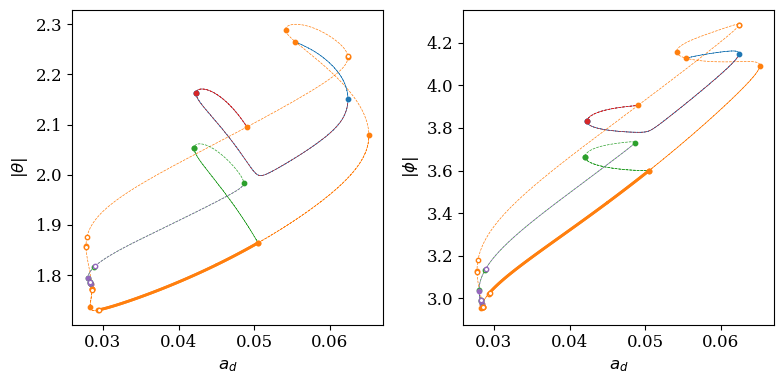

1 20


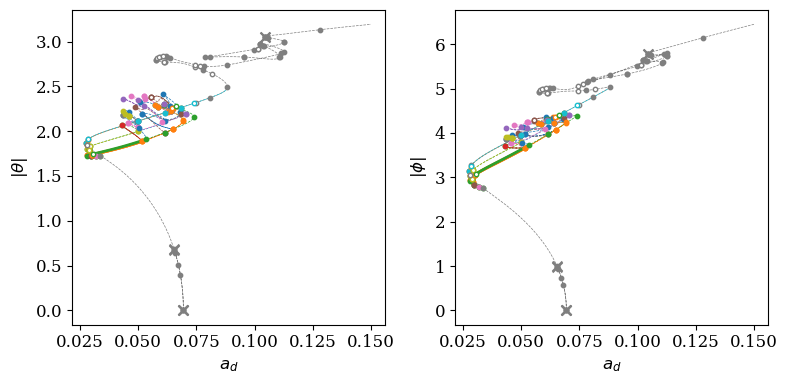

2 12


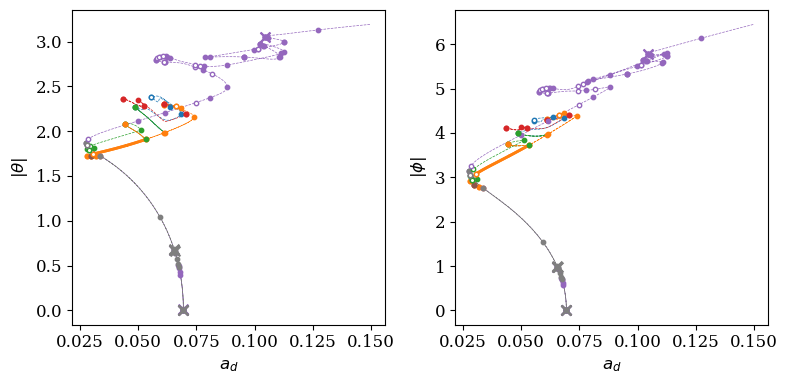

3 4


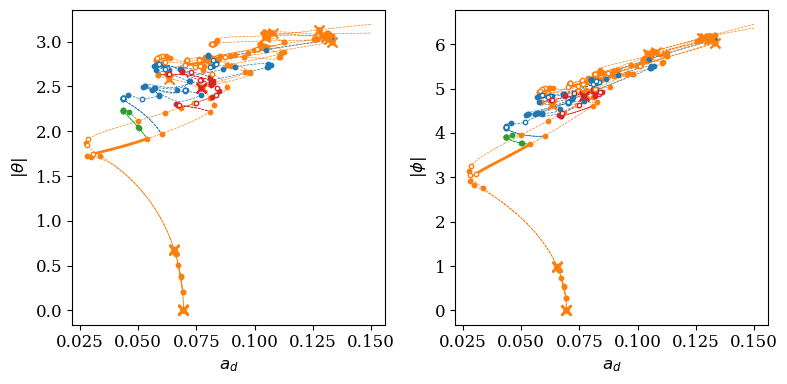

4 6


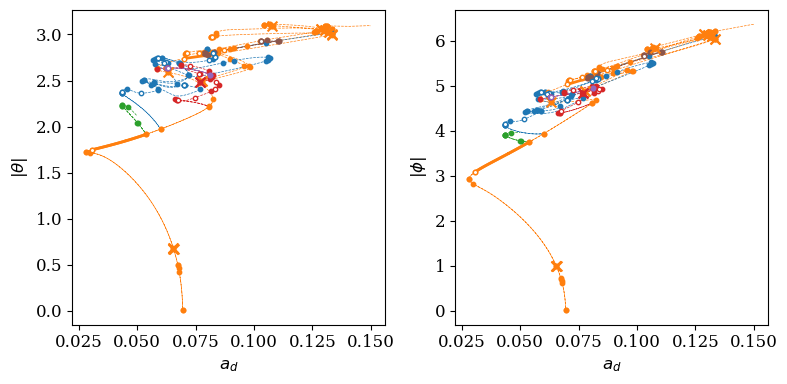

5 20


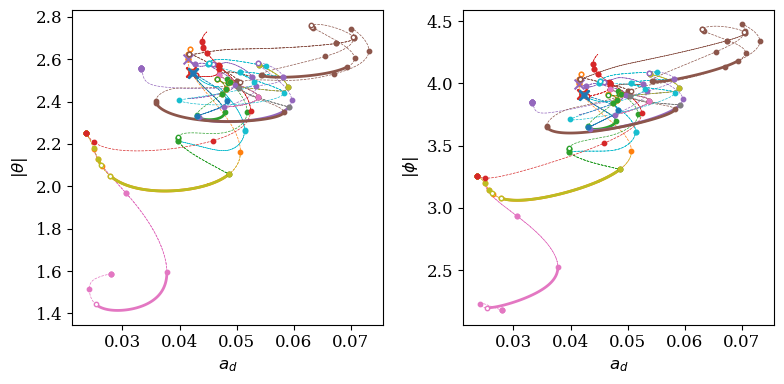

6 20


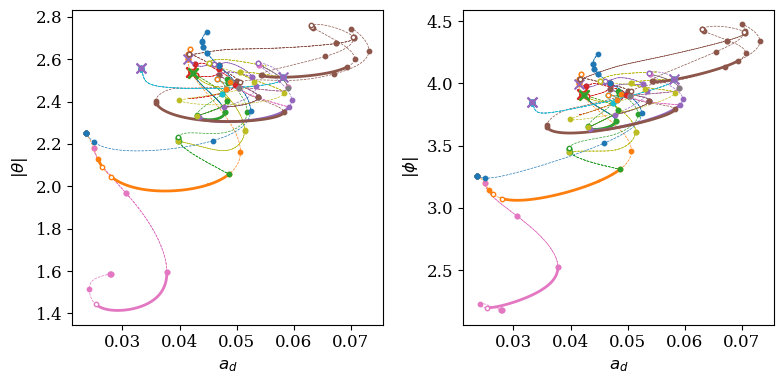

7 20


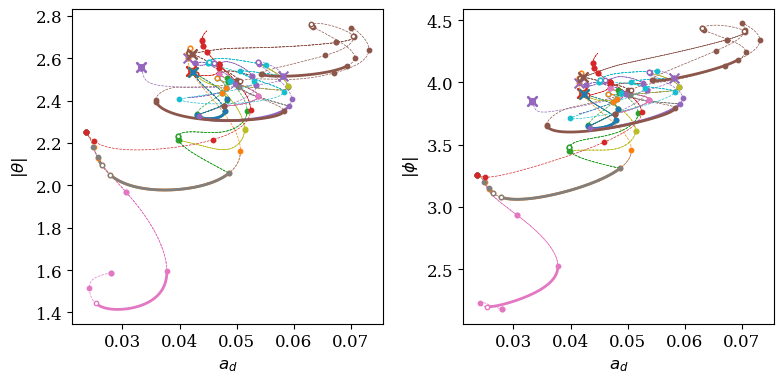

8 20


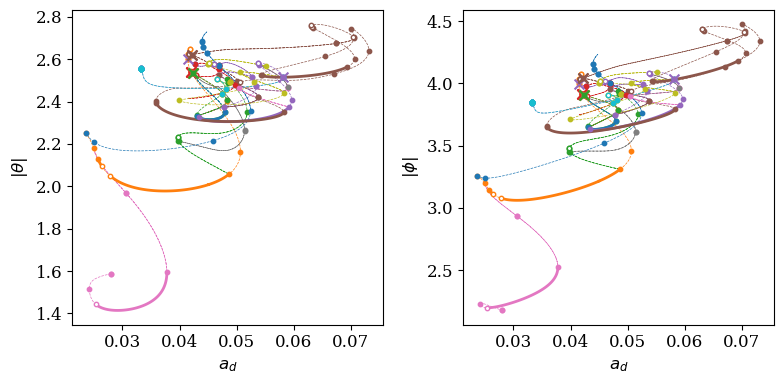

9 1


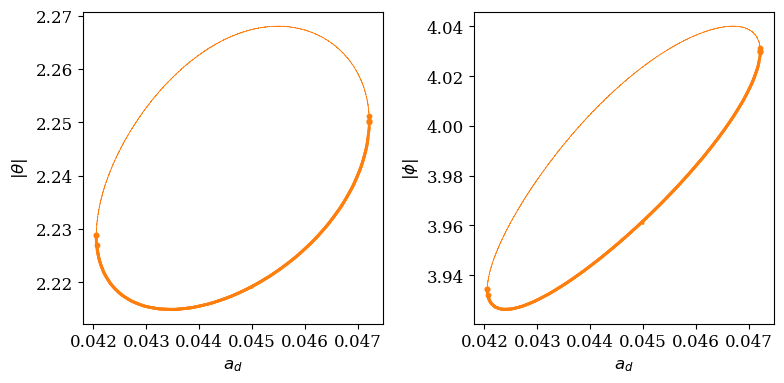

10 1


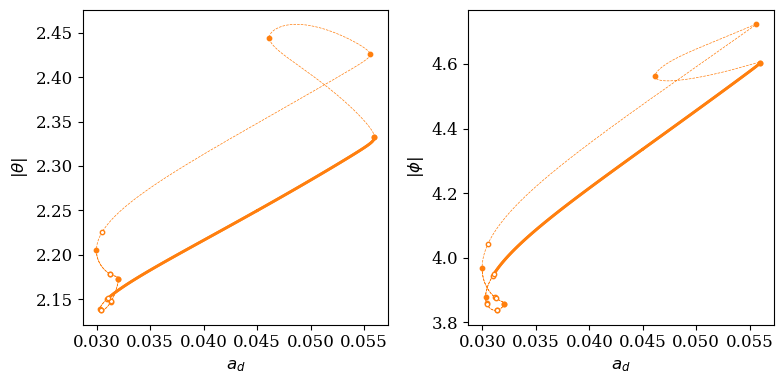

11 15


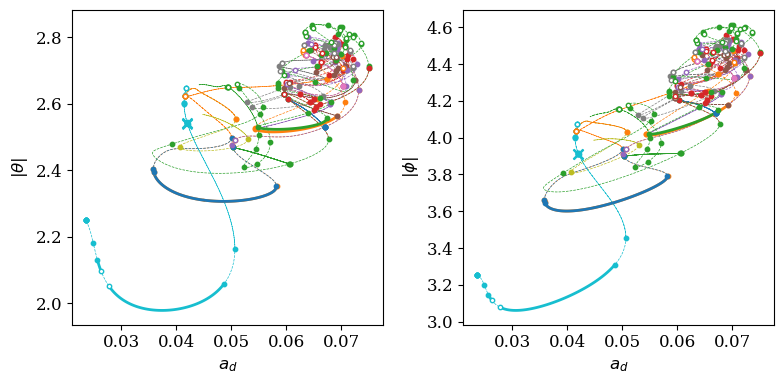

12 10


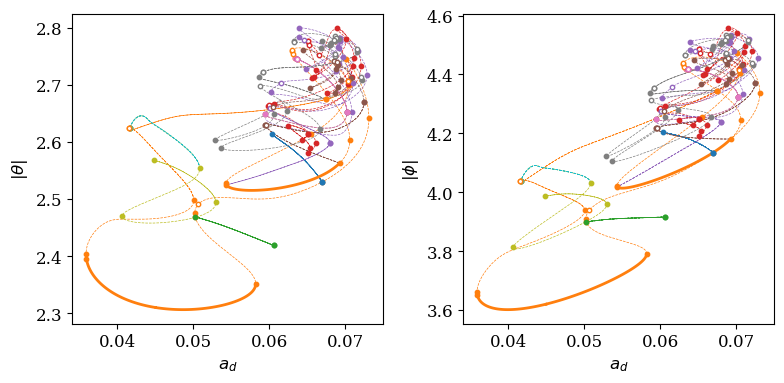

13 12


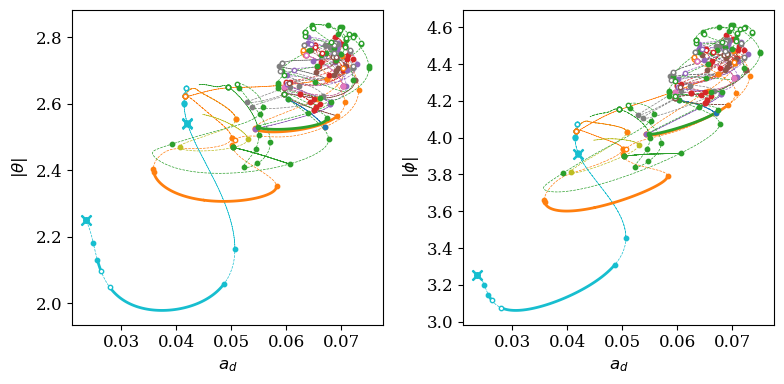

14 18


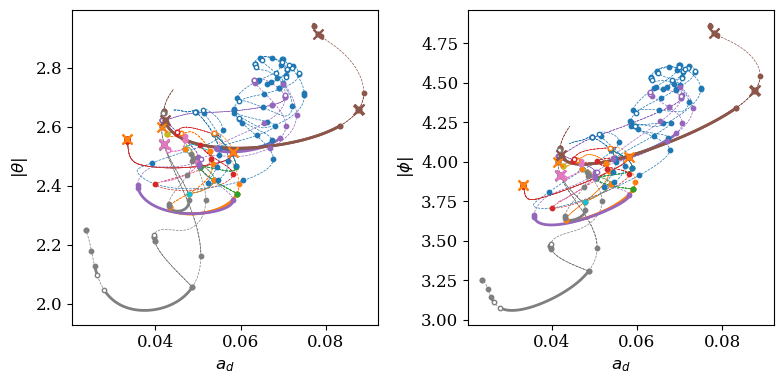

15 7


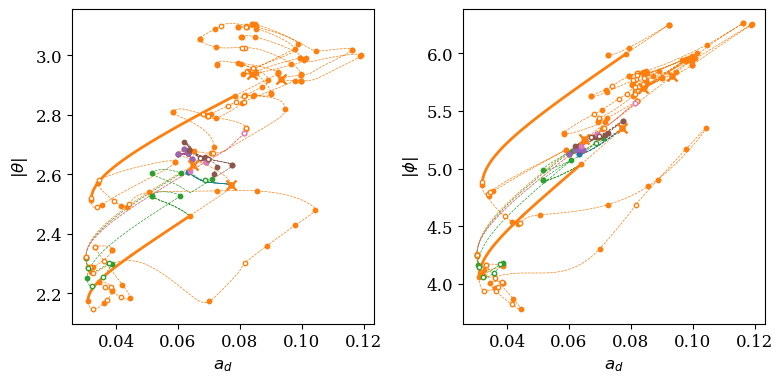

16 1


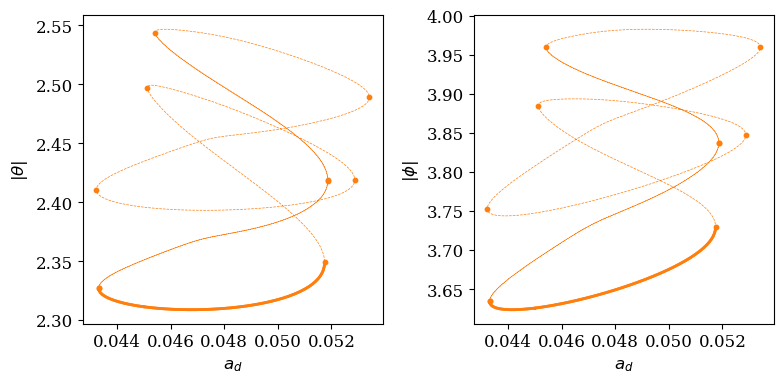

17 20


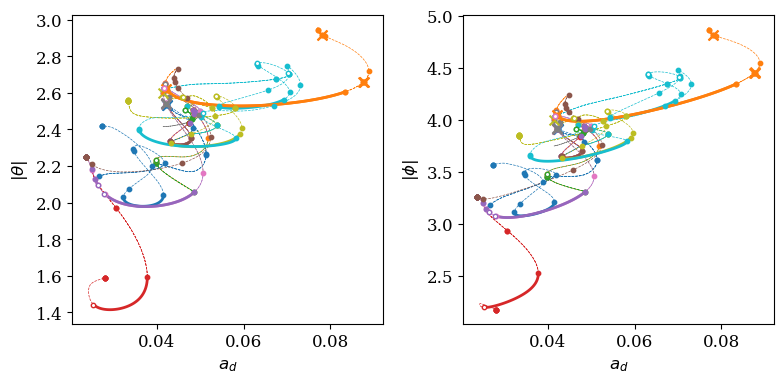

18 2


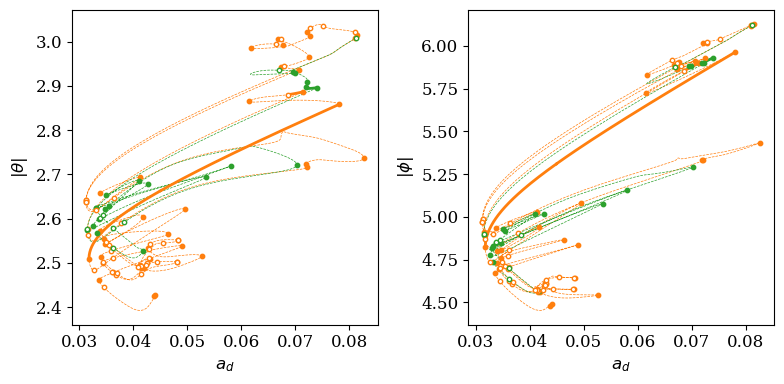

19 1


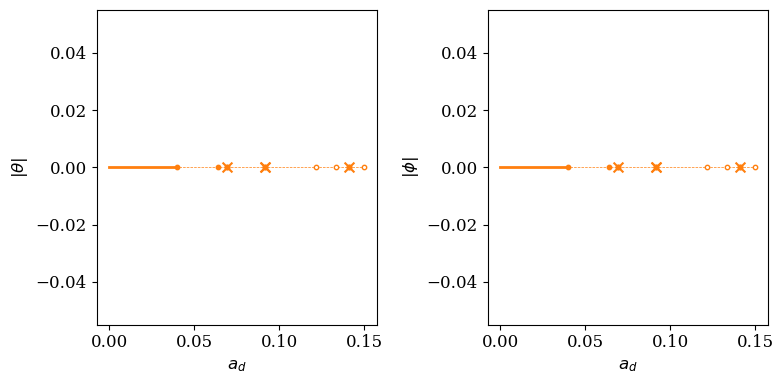

20 1


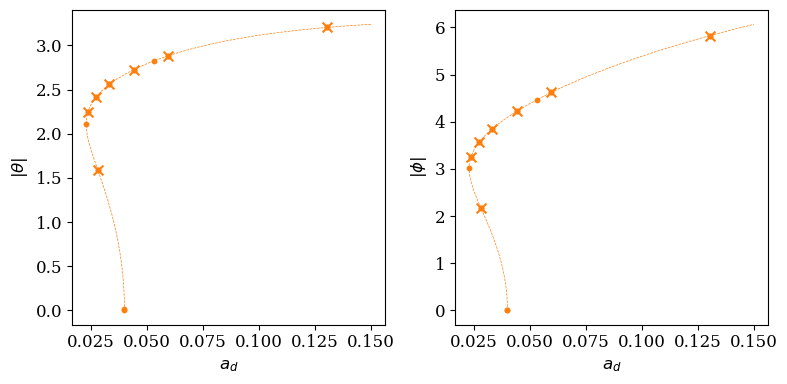

21 1


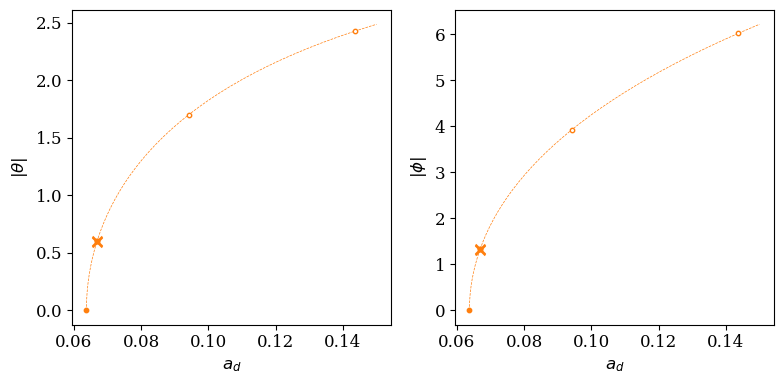

22 1


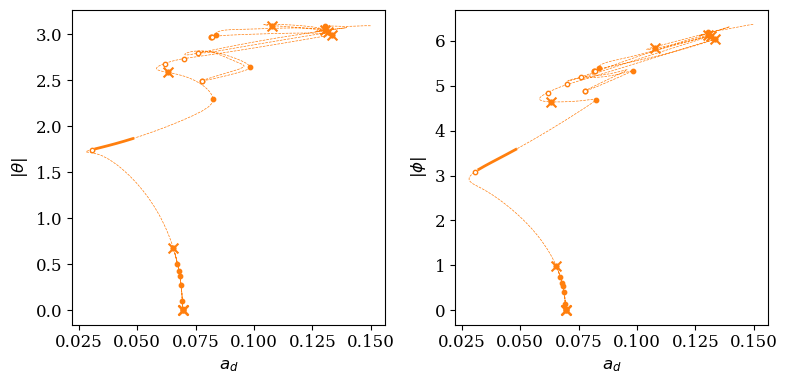

23 1


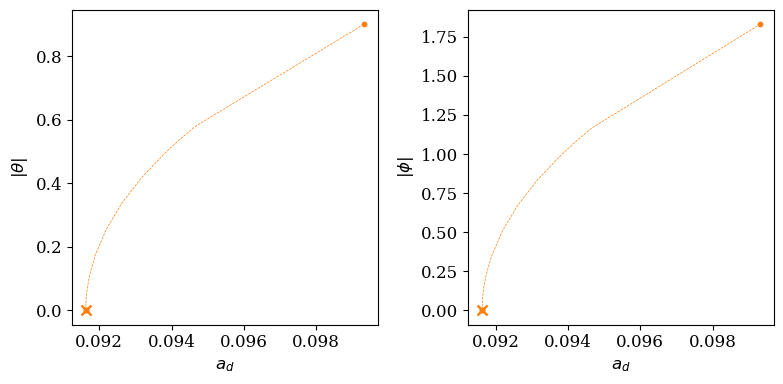

24 1


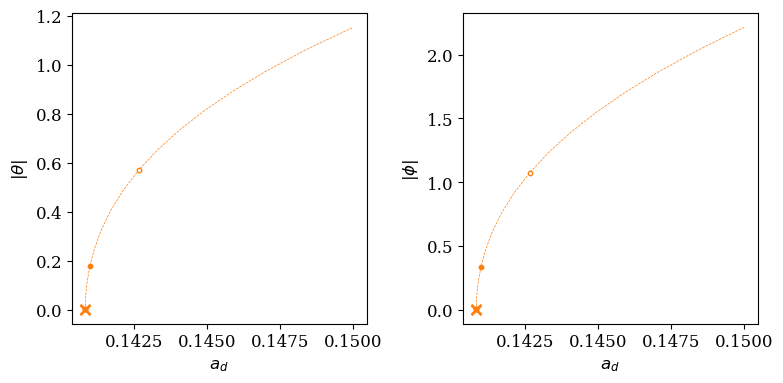

In [49]:
N=16
filebase='data/pendula/'
num_chimeras=np.count_nonzero([st.isdigit() for st in os.listdir(filebase)])

for i in range(num_chimeras):
    
    try:
        numbr=int(os.popen('ls %s%i/total*.dat | wc -l 2> /dev/null' %(filebase,i),'r',1).readline())
        if numbr==0:
            raise Exception('fail')
        print(i,numbr)
        plt.subplots(1,2,figsize=(8,4))
        
        for k in range(numbr):
            br=np.loadtxt('%s%i/total%i.dat'%(filebase,i,k+1))[:]
            if len(br)>5:
                stableinds=np.array(np.where(br[:,11]==6*N+2)[0])
                stablebranches=[]
                jumps=np.where(np.diff(stableinds)>2)[0]
                cuts=np.zeros(2+2*len(jumps),dtype=int)
                cuts[0]=0
                cuts[-1]=-1
                cuts[1:-1:2]=jumps
                cuts[2:-1:2]=jumps+1
                for j in range(0,len(cuts),2):
                    stablebranches=stablebranches+[stableinds[cuts[j]:cuts[j+1]]]
                    
                inds=np.where(np.diff(np.sign(br[:,6]))!=0)[0]
                sbpsinds=np.intersect1d(np.concatenate([inds,inds+1]),np.where(np.abs(br[:,6])<1E-2)[0])
                steps=np.where(np.diff(sbpsinds)==1)[0]
                spbsinds=np.setdiff1d(sbpsinds,sbpsinds[steps])
                sbps=br[sbpsinds]

                inds=np.where(np.diff(np.sign(br[:,8]))!=0)[0]
                trinds=np.intersect1d(np.concatenate([inds,inds+1]),np.where(np.abs(br[:,8])<1E-2)[0])
                steps=np.where(np.diff(trinds)==1)[0]
                trinds=np.setdiff1d(trinds,trinds[steps])
                trs=br[trinds]

                inds=np.where(np.diff(np.sign(br[:,5]))!=0)[0]
                lpsinds=np.intersect1d(np.concatenate([inds,inds+1]),np.where(np.abs(br[:,5])<1E-2)[0])
                steps=np.where(np.diff(lpsinds)==1)[0]
                lpsinds=np.setdiff1d(lpsinds,lpsinds[steps])
                lps=br[lpsinds]

                plt.subplot(1,2,1)
                plt.plot(br[:,0],br[:,3],ls='--',c=colors[(k)%len(colors)],lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,3],c=colors[(k)%len(colors)],lw=2,zorder=3)
                for bp in lps:
                    plt.scatter(bp[0],bp[3],edgecolor=colors[(k)%len(colors)],facecolor=colors[(k)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[3],edgecolor=colors[(k)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[3],c=colors[(k)%len(colors)],marker='x',s=50,zorder=5)

                plt.ylabel(r'$|\theta|$')
                plt.xlabel(r'$a_d$')

                plt.subplot(1,2,2)
                plt.plot(br[:,0],br[:,4],ls='--',c=colors[(k)%len(colors)],lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,4],c=colors[(k)%len(colors)],lw=2,zorder=3)
                for bp in lps:
                    plt.scatter(bp[0],bp[4],edgecolor=colors[(k)%len(colors)],facecolor=colors[(k)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[4],edgecolor=colors[(k)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[4],c=colors[(k)%len(colors)],marker='x',s=50,zorder=5)

                plt.ylabel(r'$|\phi|$')
                plt.xlabel(r'$a_d$')

        plt.tight_layout()
        plt.show()

    except Exception as e:
        print(e)
        pass

17 20
20 1
22 1


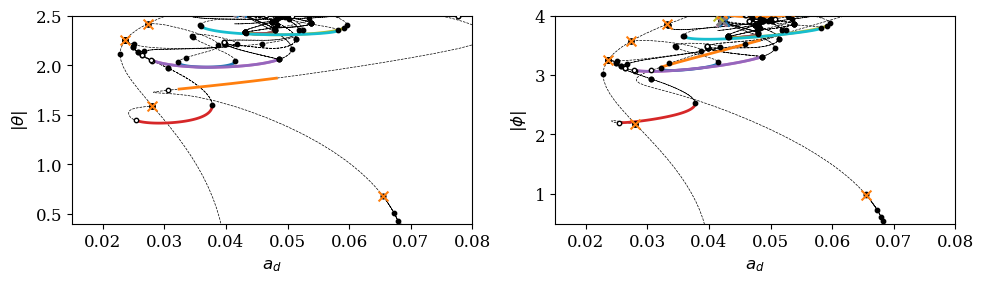

In [50]:
xlims1=[0.015,0.08]
ylims1=[0.4,2.5]
ylims2=[0.5,4]
xlims2=[0.055,0.075]
ylims3=[2.5,2.9]
ylims4=[4,4.7]

N=16
filebase='data/pendula/'
num_chimeras=np.count_nonzero([st.isdigit() for st in os.listdir(filebase)])
plt.subplots(1,2,figsize=(10,3))

for i in [17,20,22]:
    
    try:
        numbr=int(os.popen('ls %s%i/total*.dat | wc -l 2> /dev/null' %(filebase,i),'r',1).readline())
        if numbr==0:
            raise Exception('fail')
        print(i,numbr)
        
        for k in range(numbr):
            br=np.loadtxt('%s%i/total%i.dat'%(filebase,i,k+1))[:]
            if len(br)>5:
                stableinds=np.array(np.where(br[:,11]==6*N+2)[0])
                stablebranches=[]
                jumps=np.where(np.diff(stableinds)>2)[0]
                cuts=np.zeros(2+2*len(jumps),dtype=int)
                cuts[0]=0
                cuts[-1]=-1
                cuts[1:-1:2]=jumps
                cuts[2:-1:2]=jumps+1
                for j in range(0,len(cuts),2):
                    stablebranches=stablebranches+[stableinds[cuts[j]:cuts[j+1]]]

                inds=np.where(np.diff(np.sign(br[:,6]))!=0)[0]
                sbpsinds=np.intersect1d(np.concatenate([inds,inds+1]),np.where(np.abs(br[:,6])<1E-2)[0])
                steps=np.where(np.diff(sbpsinds)==1)[0]
                spbsinds=np.setdiff1d(sbpsinds,sbpsinds[steps])
                sbps=br[sbpsinds]

                inds=np.where(np.diff(np.sign(br[:,8]))!=0)[0]
                trinds=np.intersect1d(np.concatenate([inds,inds+1]),np.where(np.abs(br[:,8])<1E-2)[0])
                steps=np.where(np.diff(trinds)==1)[0]
                trinds=np.setdiff1d(trinds,trinds[steps])
                trs=br[trinds]

                inds=np.where(np.diff(np.sign(br[:,5]))!=0)[0]
                lpsinds=np.intersect1d(np.concatenate([inds,inds+1]),np.where(np.abs(br[:,5])<1E-2)[0])
                steps=np.where(np.diff(lpsinds)==1)[0]
                lpsinds=np.setdiff1d(lpsinds,lpsinds[steps])
                lps=br[lpsinds]    

                plt.subplot(1,2,1)
                plt.plot(br[:,0],br[:,3],ls='--',c='black',lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,3],c=colors[(k)%len(colors)],lw=2,zorder=3)
                for lp in lps:
                    plt.scatter(lp[0],lp[3],edgecolor='black',facecolor='black',marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[3],edgecolor='black',facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[3],c=colors[(k)%len(colors)],marker='x',s=50,zorder=5)

                plt.ylabel(r'$|\theta|$')
                plt.xlabel(r'$a_d$')

                plt.subplot(1,2,2)
                plt.plot(br[:,0],br[:,4],ls='--',c='black',lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,4],c=colors[(k)%len(colors)],lw=2,zorder=3)
                for lp in lps:
                    plt.scatter(lp[0],lp[4],edgecolor='black',facecolor='black',marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[4],edgecolor='black',facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[4],c=colors[(k)%len(colors)],marker='x',s=50,zorder=5)

                plt.ylabel(r'$|\phi|$')
                plt.xlabel(r'$a_d$')

    except Exception as e:
        print(e)
        pass
    
plt.subplot(1,2,1)
plt.xlim(xlims1)
plt.ylim(ylims1)

plt.subplot(1,2,2)
plt.xlim(xlims1)
plt.ylim(ylims2)
    
plt.tight_layout()
plt.savefig(filebase+'penduladiagram2.pdf')
plt.show()

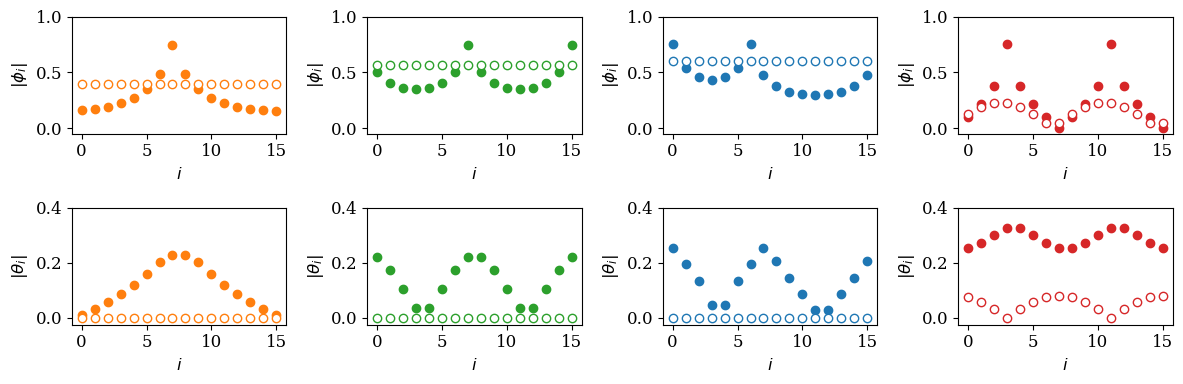

In [51]:
filebase0='data/pendula/'
filebases=[['examples/ex1final','examples/sbp1final'],['examples/ex2final','examples/sbp2final'],['examples/ex3final','examples/sbp3final'],['examples/ex4final','examples/sbp4final']]

def getstate(filebase):
    dat=np.load(filebase+'.dat.npy').T    
    N=2*int((dat.shape[-1]-1-2)/6)

    t=dat[:,0]
    x=dat[:,1:N//2+1]
    y=dat[:,N//2+1:2*N//2+1]
    theta=np.arctan2(y,x)
    u=dat[:,3*N//2+1:4*N//2+1]
    v=dat[:,4*N//2+1:5*N//2+1]
    phi=np.arctan2(v,u)

    num_cycles=5
    Nt=500
    dt=2*num_cycles/Nt

    ftheta=interp1d(t,theta,axis=0)
    fphi=interp1d(t,phi,axis=0)
    ys=np.zeros((Nt,N))
    ys[:,::2]=ftheta(np.mod(np.arange(Nt)/(Nt//num_cycles),1))
    ys[:,1::2]=fphi(np.mod(np.arange(Nt)/(Nt//num_cycles),1))
    return ys
    
    
plt.subplots(2,4,figsize=(12,4))
N=32

for i,filebase in enumerate(filebases):
    ys=np.roll(getstate(filebase0+filebase[0]),N//2)
    xs=np.roll(getstate(filebase0+filebase[1]),N//2)
    
    plt.subplot(2,4,i+5)
    plt.scatter(x=np.arange(N//2),y=np.linalg.norm(np.sin(ys[:,:N:2]),axis=0)/len(ys)**0.5,edgecolor=colors[i],facecolor=colors[i])
    plt.scatter(x=np.arange(N//2),y=np.linalg.norm(np.sin(xs[:,:N:2]),axis=0)/len(xs)**0.5,edgecolor=colors[i],facecolor='white')
    plt.xlabel(r'$i$')
    plt.ylabel(r'$|\theta_i|$')
    plt.ylim(-0.025,0.4)

    plt.subplot(2,4,i+1)
    plt.scatter(x=np.arange(N//2),y=np.linalg.norm(np.sin(ys[:,1:N:2]),axis=0)/len(ys)**0.5,edgecolor=colors[i],facecolor=colors[i])
    plt.scatter(x=np.arange(N//2),y=np.linalg.norm(np.sin(xs[:,1:N:2]),axis=0)/len(xs)**0.5,edgecolor=colors[i],facecolor='white')
    plt.xlabel(r'$i$')
    plt.ylabel(r'$|\phi_i|$')
    plt.ylim(-0.05,1)

plt.tight_layout()
plt.savefig(filebase0+'examples.pdf')

plt.show()


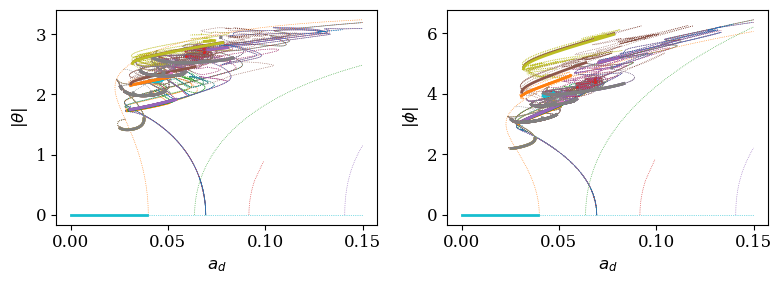

In [52]:
N=16
filebase='data/pendula/'
num_chimeras=np.count_nonzero([st.isdigit() for st in os.listdir(filebase)])
plt.subplots(1,2,figsize=(8,3))

for i in range(num_chimeras):
    try:
        numbr=int(os.popen('ls %s%i/total*.dat | wc -l 2> /dev/null' %(filebase,i),'r',1).readline())
        if numbr==0:
            raise Exception()

        for k in range(numbr):
            br=np.loadtxt('%s%i/total%i.dat'%(filebase,i,k+1))[:]
            if len(br)>5:
                if i < 20:
                    stableinds=np.array(np.where(br[:,11]==6*N+2)[0])
                else:
                    stableinds=np.array(np.where(br[:,10]==6*N+2)[0])
                stablebranches=[]
                jumps=np.where(np.diff(stableinds)>2)[0]
                cuts=np.zeros(2+2*len(jumps),dtype=int)
                cuts[0]=0
                cuts[-1]=-1
                cuts[1:-1:2]=jumps
                cuts[2:-1:2]=jumps+1
                for j in range(0,len(cuts),2):
                    stablebranches=stablebranches+[stableinds[cuts[j]:cuts[j+1]]]

                plt.subplot(1,2,1)
                plt.plot(br[:,0],br[:,3],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)
                
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,3],c=colors[(i)%len(colors)],lw=2,zorder=3)

                plt.ylabel(r'$|\theta|$')
                plt.xlabel(r'$a_d$')

                plt.subplot(1,2,2)
                plt.plot(br[:,0],br[:,4],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)

                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,4],c=colors[(i)%len(colors)],lw=2,zorder=3)

                plt.ylabel(r'$|\phi|$')
                plt.xlabel(r'$a_d$')


    except Exception as e:
        print(i,numbr)
        print(e)
        pass
    
plt.tight_layout()
plt.savefig(filebase+'penduladiagram.pdf')
plt.show()


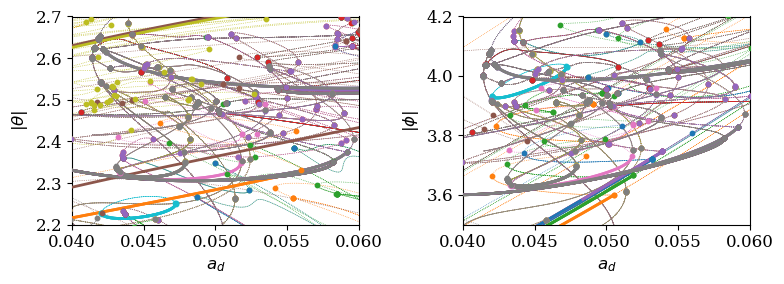

In [53]:
xlims2=[0.04,0.06]
ylims3=[2.2,2.7]
ylims4=[3.5,4.2]

N=16
filebase='data/pendula/'
num_chimeras=np.count_nonzero([st.isdigit() for st in os.listdir(filebase)])
plt.subplots(1,2,figsize=(8,3))

for i in range(num_chimeras):
    try:
        numbr=int(os.popen('ls %s%i/total*.dat | wc -l 2> /dev/null' %(filebase,i),'r',1).readline())
        if numbr==0:
            raise Exception()

        for k in range(numbr):
            br=np.loadtxt('%s%i/total%i.dat'%(filebase,i,k+1))[:]
            if len(br)>5:
                stableinds=np.array(np.where(br[:,11]==6*N+2)[0])
                stablebranches=[]
                jumps=np.where(np.diff(stableinds)>2)[0]
                cuts=np.zeros(2+2*len(jumps),dtype=int)
                cuts[0]=0
                cuts[-1]=-1
                cuts[1:-1:2]=jumps
                cuts[2:-1:2]=jumps+1
                for j in range(0,len(cuts),2):
                    stablebranches=stablebranches+[stableinds[cuts[j]:cuts[j+1]]]

                jumps=1+np.array(np.where(np.diff(br[:,-1])!=0)[0])
                jumps=jumps[jumps+1<len(br)]
                jumps=jumps[jumps-1<len(br)]
                bpinds=np.array(np.where(np.sign(br[jumps+1,6]**2+br[jumps+1,7]**2-1)/np.sign(br[jumps-1,6]**2+br[jumps-1,7]**2-1)>0)[0],dtype=int)
                sbpsinds=np.array(np.where(np.sign(br[jumps+1,6]-1)/np.sign(br[jumps-1,6]-1)<0)[0],dtype=int)
                sbpsinds=sbpsinds[np.intersect1d(np.intersect1d(np.where(np.abs(br[jumps[sbpsinds],6]-1)<1e-1)[0],np.where(np.abs(br[jumps[sbpsinds]+1,6]-1)<1e-1)[0]),np.where(np.abs(br[jumps[sbpsinds]-1,6]-1)<1e-1)[0])]
                trinds=np.array(np.where(np.sign(br[jumps+1,6]**2+br[jumps+1,7]**2-1)/np.sign(br[jumps-1,6]**2+br[jumps-1,7]**2-1)<0)[0],dtype=int)
                trinds=trinds[np.intersect1d(np.intersect1d(np.where(np.abs(br[jumps[trinds],6]**2+br[jumps[trinds],7]**2-1)<1e-1)[0],np.where(np.abs(br[jumps[trinds]+1,6]**2+br[jumps[trinds]+1,7]**2-1)<1e-1)[0]),np.where(np.abs(br[jumps[trinds]-1,6]**2+br[jumps[trinds]-1,7]**2-1)<1e-1)[0])]
                trinds=np.setdiff1d(trinds,sbpsinds)
                bpinds=np.setdiff1d(bpinds,sbpsinds)
                bps=br[jumps[bpinds]]                
                sbps=br[jumps[sbpsinds]]
                trs=br[jumps[trinds]]            

                plt.subplot(1,2,1)
                plt.plot(br[:,0],br[:,3],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,3],c=colors[(i)%len(colors)],lw=2,zorder=3)
                for bp in bps:
                    plt.scatter(bp[0],bp[3],edgecolor=colors[(i)%len(colors)],facecolor=colors[(i)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[3],edgecolor=colors[(i)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[3],c=colors[(i)%len(colors)],marker='x',s=50,zorder=5)
                    
                plt.ylabel(r'$|\theta|$')
                plt.xlabel(r'$a_d$')
                plt.ylim(ylims3)
                plt.xlim(xlims2)


                plt.subplot(1,2,2)
                plt.plot(br[:,0],br[:,4],ls=':',c=colors[(i)%len(colors)],lw=0.5,label=k,zorder=1)
                for branch in stablebranches:
                    plt.plot(br[branch,0],br[branch,4],c=colors[(i)%len(colors)],lw=2,zorder=3)
                for bp in bps:
                    plt.scatter(bp[0],bp[4],edgecolor=colors[(i)%len(colors)],facecolor=colors[(i)%len(colors)],marker='o',s=10,zorder=4)
                for tr in trs:
                    plt.scatter(tr[0],tr[4],edgecolor=colors[(i)%len(colors)],facecolor='white',marker='o',s=10,zorder=5)
                for sbp in sbps:
                    plt.scatter(sbp[0],sbp[4],c=colors[(i)%len(colors)],marker='x',s=50,zorder=5)

                plt.ylabel(r'$|\phi|$')
                plt.xlabel(r'$a_d$')
                plt.ylim(ylims4)
                plt.xlim(xlims2)



    except Exception as e:
        print(e)
        pass
    
plt.tight_layout()
plt.savefig(filebase+'penduladiagram3.pdf')
plt.show()


Critical driving for period doubling

In [74]:
from scipy.linalg import eig

delta=0.25
omega=3.5
kappa=1
eta=0.1

N2=3
dij=np.eye(2).reshape((1,2,1,2))
dmn=np.eye(2*N2+1).reshape((2*N2+1,1,2*N2+1,1))
dmn2=(np.eye(2*N2+1,k=1)+np.eye(2*N2+1,k=-1)).reshape((2*N2+1,1,2*N2+1,1))
ns=np.arange(-N2,N2+1).reshape((2*N2+1,1,1,1))
js=np.arange(2).reshape((1,2,1,1))
Li=(1+(-1)**(1+js)*delta)

for k in np.pi/8*np.arange(0,9):
    A=((Li*(-omega**2*(0.5+ns)**2+1j*omega*eta*(0.5+ns)+2*kappa)+1)*dij-2*Li*kappa*np.cos(k/2)*np.roll(dij,1,axis=1))*dmn
    B=-omega**2/2*dmn2*dij
    evals,evecs=eig(A.reshape((2*(2*N2+1),2*(2*N2+1))),B.reshape((2*(2*N2+1),2*(2*N2+1))))

    inds=np.where(np.abs(np.imag(evals))<1e-6)[0]
    inds=np.intersect1d(inds,np.where(np.real(evals)>0)[0])
    inds=np.intersect1d(inds,np.where(np.isfinite(np.real(evals)))[0])

    print(k,np.real(evals[inds]))

0.0 [0.34755287 0.30683179]
0.39269908169872414 [0.34001906 0.30151134]
0.7853981633974483 [0.3180663  0.28566495]
1.1780972450961724 [0.28358247 0.25958084]
1.5707963267948966 [0.23973301 0.2234244 ]
1.9634954084936207 [0.17690722 0.19113269]
2.356194490192345 [0.12278899 0.14083289]
2.748893571891069 [0.06944471 0.09162983]
3.141592653589793 [0.03994279 0.06372756]
